In [92]:
#Importamos las librerías
import pandas as pd
import numpy as np
#Librerías visualizacion
import matplotlib.pyplot as plt
import seaborn as sns
#Librerias de maching learning 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

In [93]:
df=pd.read_csv("TotalesPorRegion_T.csv")

In [94]:
df.columns

Index(['Region', 'Arica y Parinacota', 'Tarapacá', 'Antofagasta', 'Atacama',
       'Coquimbo', 'Valparaíso', 'Metropolitana', 'O’Higgins', 'Maule',
       ...
       'O’Higgins.12', 'Maule.12', 'Ñuble.12', 'Biobío.12', 'Araucanía.12',
       'Los Ríos.12', 'Los Lagos.12', 'Aysén.12', 'Magallanes.12', 'Total.12'],
      dtype='object', length=222)

In [95]:
b=['Arica y Parinacota','Tarapacá', 'Antofagasta', 'Atacama','Coquimbo', 'Valparaíso', 'Metropolitana', 'O’Higgins', 'Maule','Ñuble',
   'Bio Bío','Araucania','Los Rios','Los lagos','Aysen','Magallanes','Total']
c=['Casos acumulados','Casos nuevos totales','Casos nuevos con sintomas','Casos nuevos sin sintomas','Casos nuevos sin notificar',
   'Fallecidos totales','Casos confirmados recuperados','Casos activos confirmados','Casos activos probables','Casos probables acumulados',
  'Casos confirmados por antigeno','Casos nuevos confirmados por antigeno','Casos con sospecha de reinfeccion']
d=[]
tb=len(b)
tc=len(c)
for i in range(tc):
    for j in range(tb):
        d.append(b[j]+' '+c[i])
print(np.size(d))

221


In [96]:
a=['Fecha']+d
print(np.size(a))
df.columns = a

222


In [97]:
df.describe()

,Fecha,Arica y Parinacota Casos acumulados,Tarapacá Casos acumulados,Antofagasta Casos acumulados,Atacama Casos acumulados,Coquimbo Casos acumulados,Valparaíso Casos acumulados,Metropolitana Casos acumulados,O’Higgins Casos acumulados,Maule Casos acumulados,...,O’Higgins Casos con sospecha de reinfeccion,Maule Casos con sospecha de reinfeccion,Ñuble Casos con sospecha de reinfeccion,Bio Bío Casos con sospecha de reinfeccion,Araucania Casos con sospecha de reinfeccion,Los Rios Casos con sospecha de reinfeccion,Los lagos Casos con sospecha de reinfeccion,Aysen Casos con sospecha de reinfeccion,Magallanes Casos con sospecha de reinfeccion,Total Casos con sospecha de reinfeccion
count,683,683,683,683,683,683,683,683,683,683,...,324,324,324,324,324,324,324,324,324,324
unique,683,654,659,666,637,654,669,683,661,673,...,48,55,39,95,99,47,84,10,51,310
top,2021-09-01,0.0,0.0,0.0,1.0,0.0,0.0,697084,0.0,9.0,...,54,66,49,117,90,41,80,1,165,1827
freq,1,16,20,11,15,16,13,1,16,4,...,47,45,44,38,31,56,36,115,54,3


In [98]:
df=df.drop(df.index[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29]])
df.reset_index(inplace=True, drop=False)
###corté los datos para tener las mismas fechas en esta data y los casos uci


In [99]:
df2=pd.read_csv("UCI_T.csv")
df2=df2.drop(df2.index[[0,1]])
df2 = df2.fillna(0)
df2.reset_index(inplace=True, drop=False)
#cargamos data extra

In [100]:
df2['Caso total UCI'] = df2['Arica y Parinacota']+df2['Tarapacá']+df2['Antofagasta']+df2['Atacama']+df2['Coquimbo']+df2['Valparaíso']+df2['Metropolitana']+df2['O’Higgins']+df2['Maule']+df2['Ñuble']+df2['Biobío']+df2['Araucanía']+df2['Los Ríos']+df2['Los Lagos']+df2['Aysén']+df2['Magallanes']


In [101]:
#Agregamos a nuestra data los casos uci
df['Arica y Parinacota Caso UCI']=df2['Arica y Parinacota']
df['Tarapacá Caso UCI']=df2['Tarapacá']
df['Antofagasta Caso UCI']=df2['Antofagasta']
df['Atacama Caso UCI']=df2['Atacama']
df['Coquimbo Caso UCI']=df2['Coquimbo']
df['Valparaíso Caso UCI']=df2['Valparaíso']
df['Metropolitana Caso UCI']=df2['Metropolitana']
df['O’Higgins Caso UCI']=df2['O’Higgins']
df['Maule Caso UCI']=df2['Maule']
df['Ñuble Caso UCI']=df2['Ñuble']
df['Bio Bío Caso UCI']=df2['Biobío']
df['Araucania Caso UCI']=df2['Araucanía']
df['Los Rios Caso UCI']=df2['Los Ríos']
df['Los lagos Caso UCI']=df2['Los Lagos']
df['Aysen Caso UCI']=df2['Aysén']
df['Magallanes Caso UCI']=df2['Magallanes']
df['Total Caso UCI']=df2['Caso total UCI']
a.append('Arica y Parinacota Caso UCI')
a.append('Tarapacá Caso UCI')
a.append('Antofagasta Caso UCI')
a.append('Atacama Caso UCI')
a.append('Coquimbo Caso UCI')
a.append('Valparaíso Caso UCI')
a.append('Metropolitana Caso UCI')
a.append('O’Higgins Caso UCI')
a.append('Maule Caso UCI')
a.append('Ñuble Caso UCI')
a.append('Bio Bío Caso UCI')
a.append('Araucania Caso UCI')
a.append('Los Rios Caso UCI')
a.append('Los lagos Caso UCI')
a.append('Aysen Caso UCI')
a.append('Magallanes Caso UCI')
a.append('Total Caso UCI')

<h1 style="text-align:center;font-family: 'Computer Modern Sans';font-weight:bolder">Regiones de chile</h1>

### Análisis Exploratorio univariado

In [102]:
def ResumenGraf(df,columna):
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    #plt.title(f"{columna} boxplot")
    df[columna].plot(kind="box",vert=False)
    plt.subplot(1,2,2)
    #plt.title(f"{columna} Histograma")
    sns.distplot(df[columna],kde=False,bins=70);

In [103]:
#visto que la data considera columnas como datos distintos a float crearé una función que transforme todo a float
ta=len(a)
for i in range(1,ta):
    df[a[i]] = pd.to_numeric(df[a[i]], downcast="float")
del(df['index'])

In [104]:
df.columns

Index(['Fecha', 'Arica y Parinacota Casos acumulados',
       'Tarapacá Casos acumulados', 'Antofagasta Casos acumulados',
       'Atacama Casos acumulados', 'Coquimbo Casos acumulados',
       'Valparaíso Casos acumulados', 'Metropolitana Casos acumulados',
       'O’Higgins Casos acumulados', 'Maule Casos acumulados',
       ...
       'O’Higgins Caso UCI', 'Maule Caso UCI', 'Ñuble Caso UCI',
       'Bio Bío Caso UCI', 'Araucania Caso UCI', 'Los Rios Caso UCI',
       'Los lagos Caso UCI', 'Aysen Caso UCI', 'Magallanes Caso UCI',
       'Total Caso UCI'],
      dtype='object', length=239)

### Selector de región
Cambiar la variable selector para ver distintas regiones

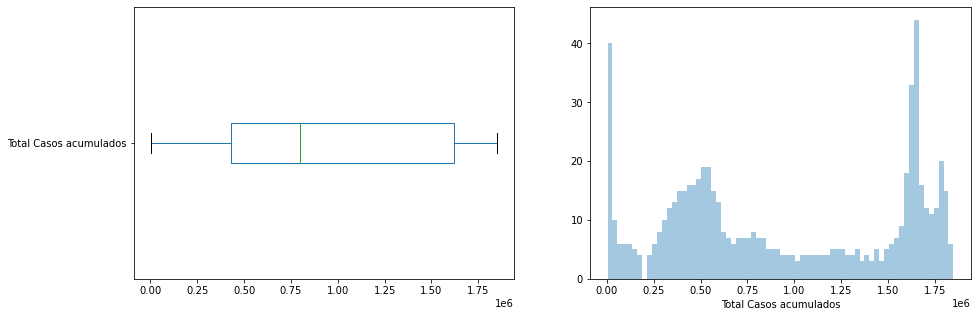

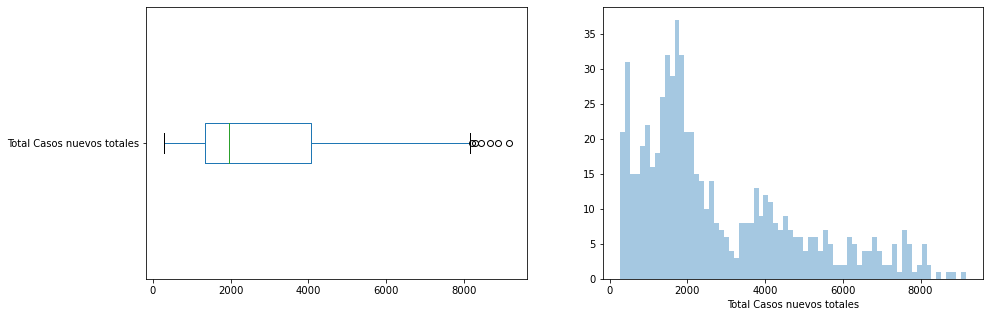

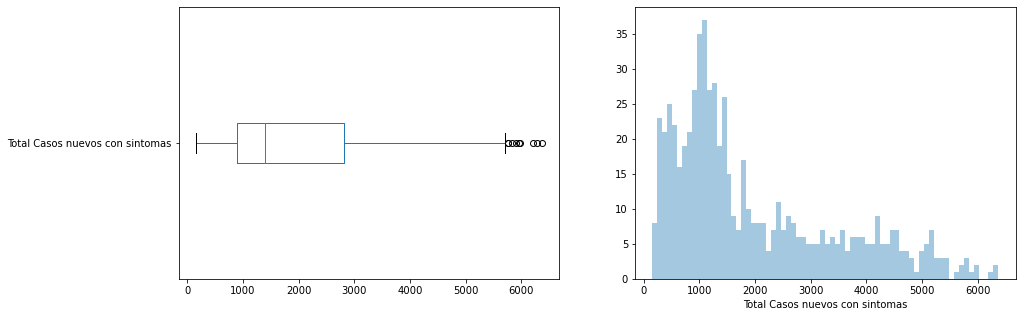

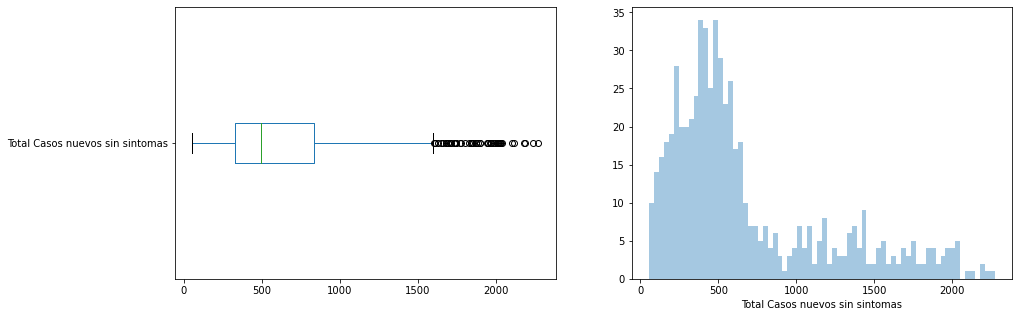

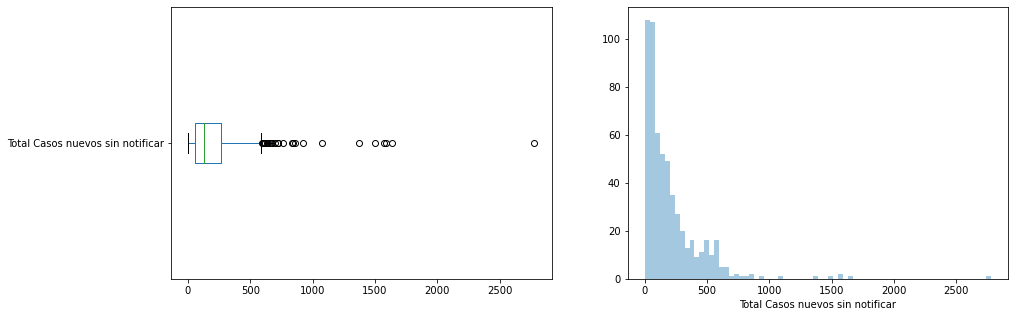

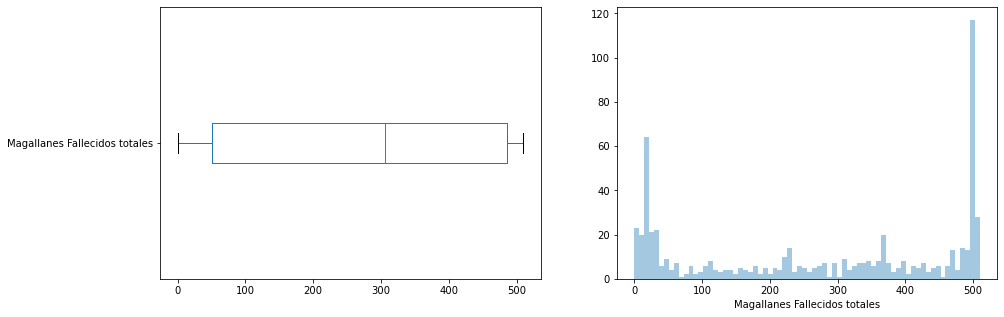

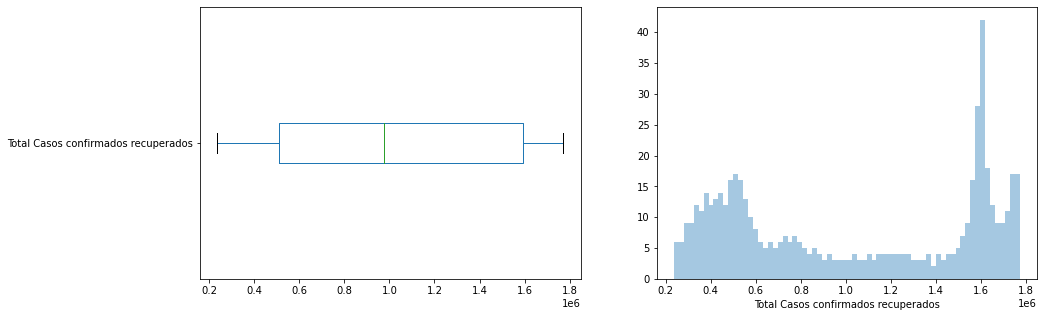

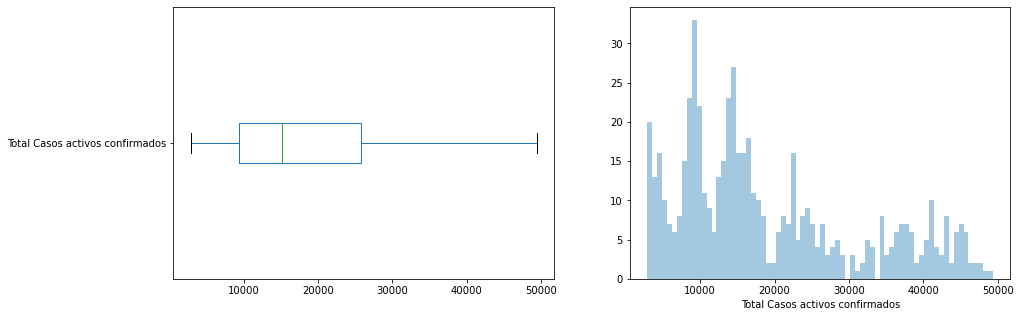

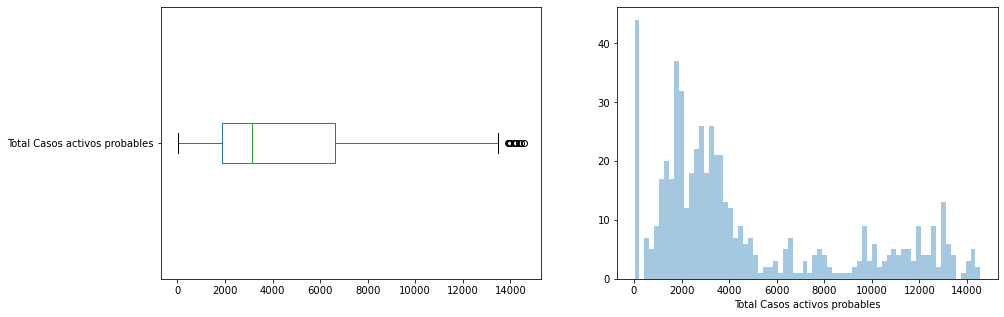

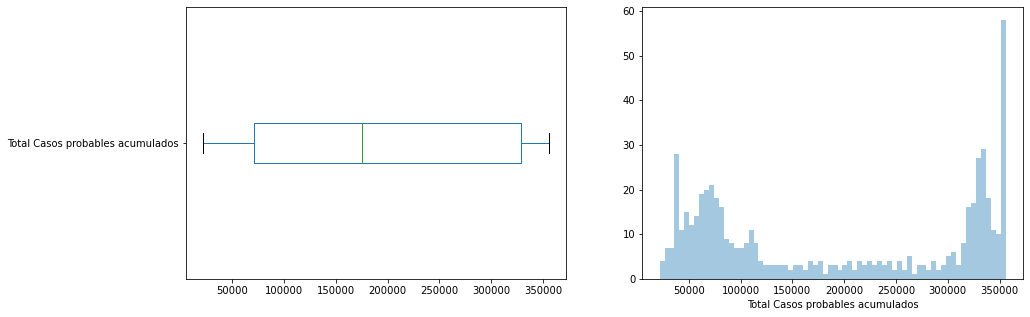

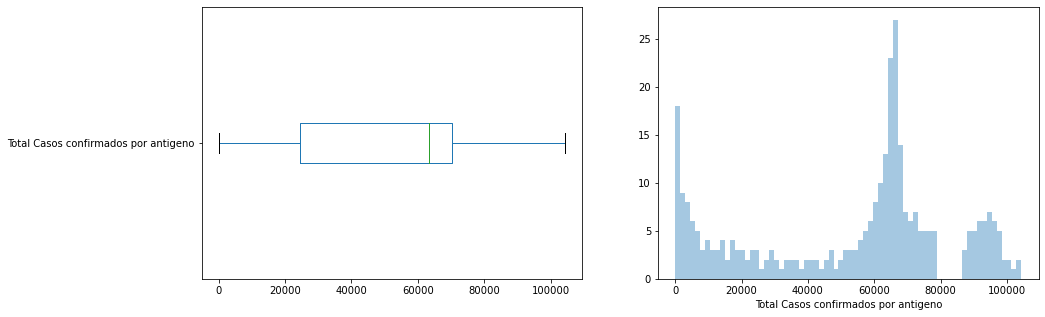

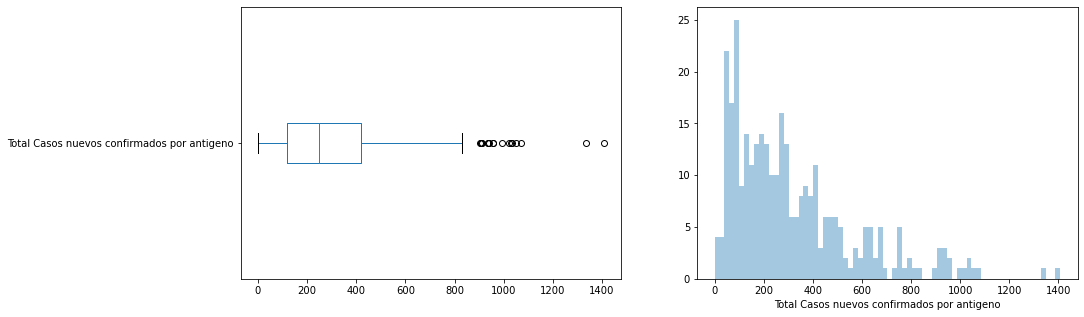

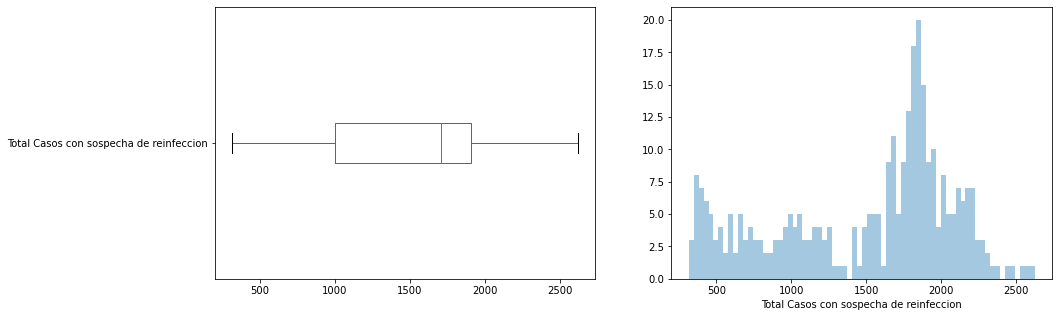

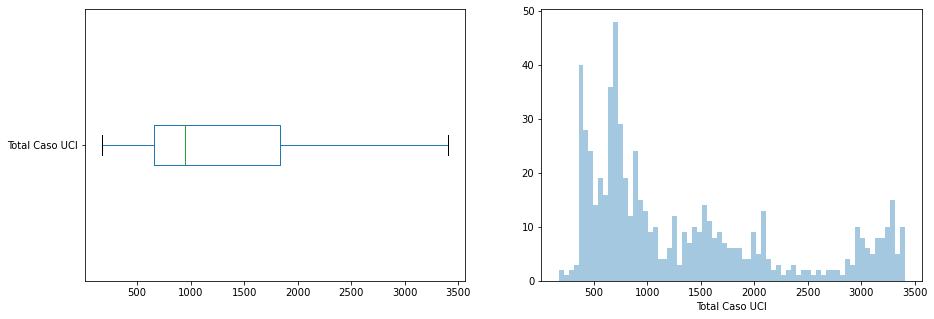

In [578]:
#copiar y pegar una de estas opciones Arica,Tarapaca,Antofagasta,Atacama,Coquimbo,Valparaiso,Metropolitana,Ohiggins,Maule,Ñuble,Biobio,
#Araucania,Los rios, Los lagos, Aysen, Magallanes, Chile
selector='Chile'
td=len(a)
if selector=='Arica':
    vselector=[1,18,35,52,69,86,103,120,137,154,171,188,205,222]
    uselector=a[222]
if selector=='Tarapaca':
    vselector=[2,19,36,53,70,87,104,121,138,155,172,189,206,223]
    uselector=a[223]
if selector=='Antofagasta':
    vselector=[3,20,37,54,71,88,105,122,139,156,173,190,207,224]
    uselector=a[224]
if selector=='Atacama':
    vselector=[4,21,38,55,72,89,106,123,140,157,174,191,208,225]
    uselector=a[225]
if selector=='Coquimbo':
    vselector=[5,22,39,56,73,90,107,124,141,158,175,192,209,226]
    uselector=a[226]
if selector=='Valparaiso':
    vselector=[6,23,40,57,74,91,108,125,142,159,176,193,210,227]
    uselector=a[227]
if selector=='Metropolitana':
    vselector=[7,24,41,58,75,92,109,126,143,160,177,194,211,228]
    uselector=a[228]
if selector=='Ohiggins':
    vselector=[8,25,42,59,76,93,110,127,144,161,178,195,212,229]
    uselector=a[229]
if selector=='Maule':
    vselector=[9,26,43,60,77,94,111,128,145,162,179,196,213,230]
    uselector=a[230]
if selector=='Ñuble':
    vselector=[10,27,44,61,78,95,112,129,146,163,180,197,214,231]
    uselector=a[231]
if selector=='Biobio':
    vselector=[11,28,45,62,79,96,113,130,147,164,181,198,215,232]
    uselector=a[232]
if selector=='Araucania':
    vselector=[12,29,46,63,80,97,114,131,148,165,182,199,216,233]
    uselector=a[233]
if selector=='Los rios':
    vselector=[13,30,47,64,81,98,115,132,149,166,183,200,217,234]
    uselector=a[234]
if selector=='Los lagos':
    vselector=[14,31,48,65,82,99,116,133,150,167,184,201,218,235]
    uselector=a[235]
if selector=='Aysen':
    vselector=[15,32,49,66,83,99,117,134,151,168,185,202,219,236]
    uselector=a[236]
if selector=='Magallanes':
    vselector=[16,33,50,67,84,100,118,135,152,169,186,203,220,237]
    uselector=a[237]
if selector=='Chile':
    vselector=[17,34,51,68,85,101,119,136,153,170,187,204,221,238]
    uselector=a[238]
for i in vselector:
    ResumenGraf(df,a[i])
#analizamos los graficos para ver posibles errores

In [579]:
dfa=df.iloc[:,vselector]
dfa
dfa.describe()

,Total Casos acumulados,Total Casos nuevos totales,Total Casos nuevos con sintomas,Total Casos nuevos sin sintomas,Total Casos nuevos sin notificar,Magallanes Fallecidos totales,Total Casos confirmados recuperados,Total Casos activos confirmados,Total Casos activos probables,Total Casos probables acumulados,Total Casos confirmados por antigeno,Total Casos nuevos confirmados por antigeno,Total Casos con sospecha de reinfeccion,Total Caso UCI
count,6.530000e+02,653.000000,653.000000,625.000000,575.000000,653.000000,5.640000e+02,572.000000,572.000000,572.000000,323.000000,323.000000,323.000000,653.000000
mean,9.368684e+05,2786.072021,1962.823853,670.383972,206.342606,274.251160,1.027332e+06,19099.449219,4649.110352,192958.328125,52733.472656,315.281738,1489.359131,1340.879028
std,6.059593e+05,2053.044678,1475.568115,509.569489,244.431763,191.225525,5.274784e+05,12308.833008,4051.880615,123547.421875,30118.150391,254.636093,592.411621,922.213806
min,3.031000e+03,273.000000,156.000000,56.000000,4.000000,0.000000,2.361540e+05,2910.000000,23.000000,21897.000000,61.000000,0.000000,316.000000,173.000000
25%,4.305350e+05,1331.000000,893.000000,329.000000,53.000000,50.000000,5.090675e+05,9397.500000,1853.000000,70886.250000,24573.500000,120.000000,1001.000000,657.000000
50%,7.994600e+05,1966.000000,1395.000000,494.000000,128.000000,306.000000,9.764450e+05,15123.000000,3146.000000,174809.500000,63309.000000,248.000000,1705.000000,942.000000
75%,1.618457e+06,4068.000000,2825.000000,837.000000,267.500000,485.000000,1.592355e+06,25788.000000,6615.000000,329065.750000,70371.500000,417.500000,1907.000000,1839.000000
max,1.849465e+06,9171.000000,6368.000000,2273.000000,2778.000000,510.000000,1.771647e+06,49356.000000,14568.000000,355704.000000,104289.000000,1408.000000,2622.000000,3406.000000


### Análisis Exploratorio multivariado

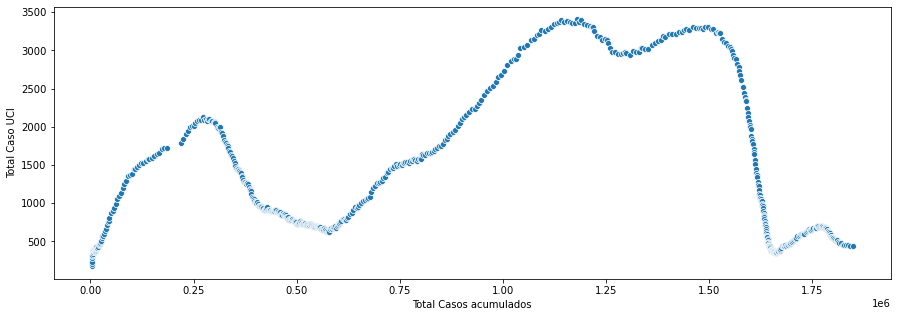

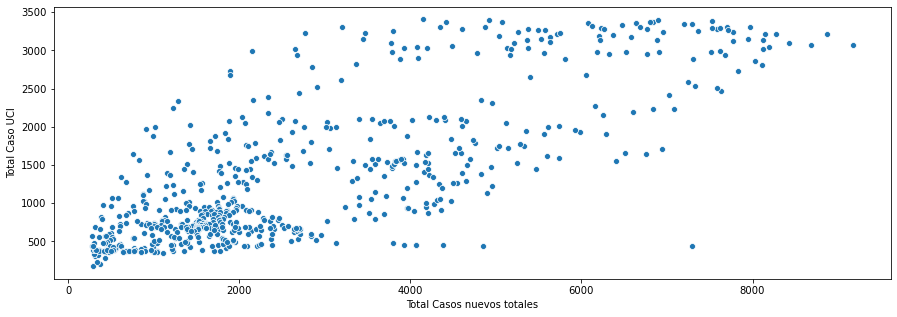

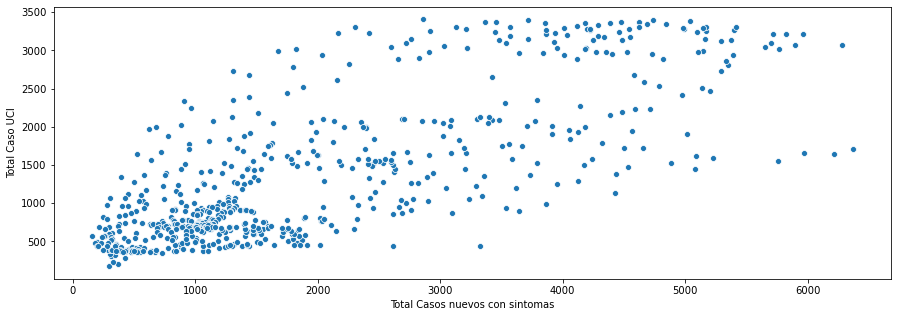

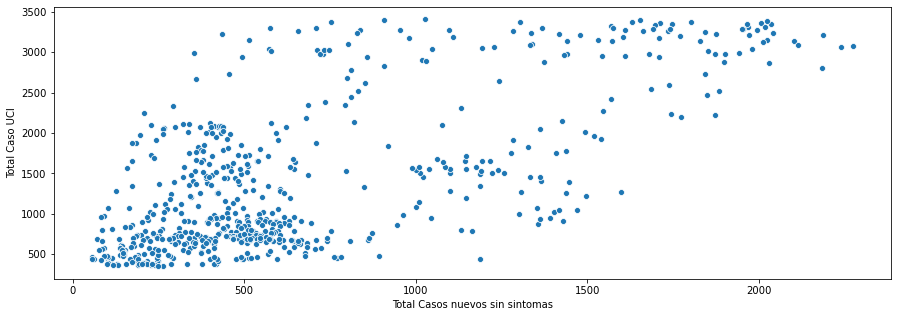

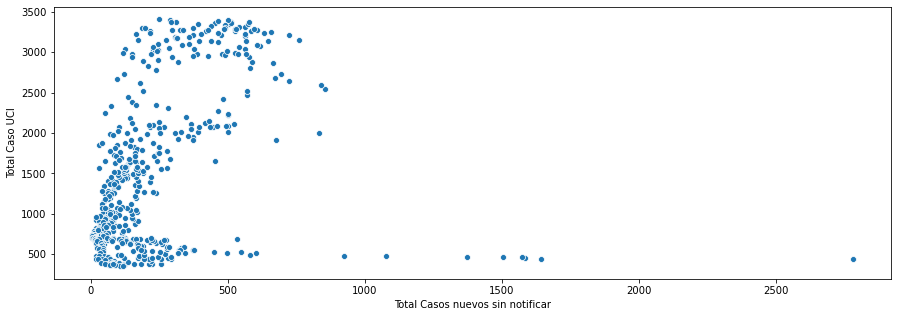

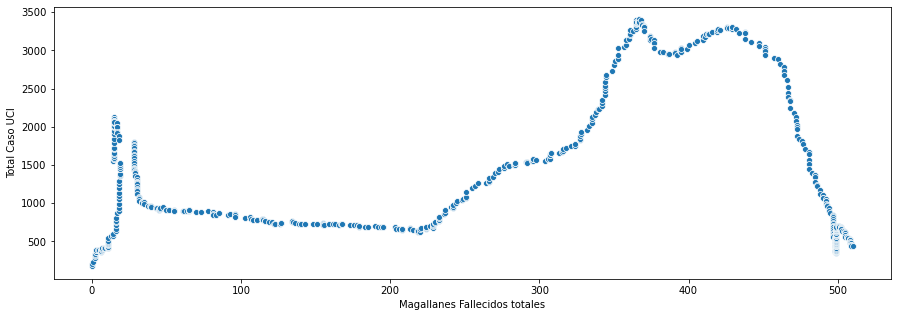

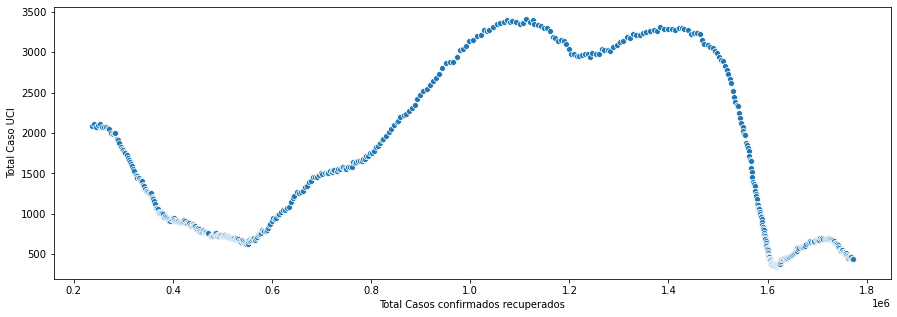

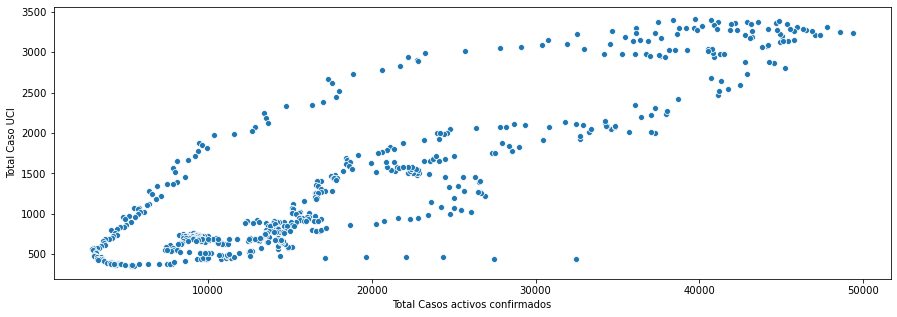

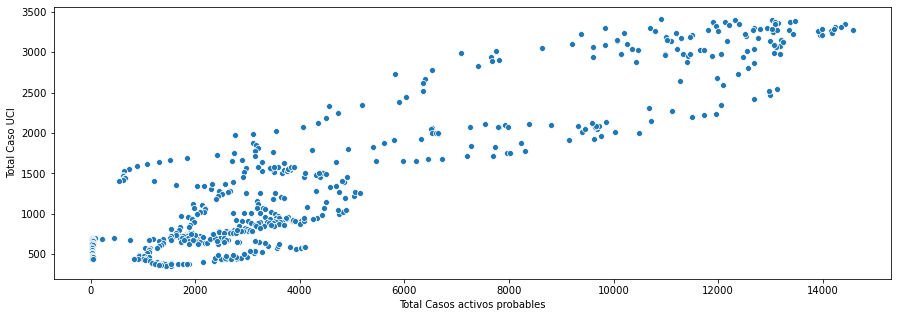

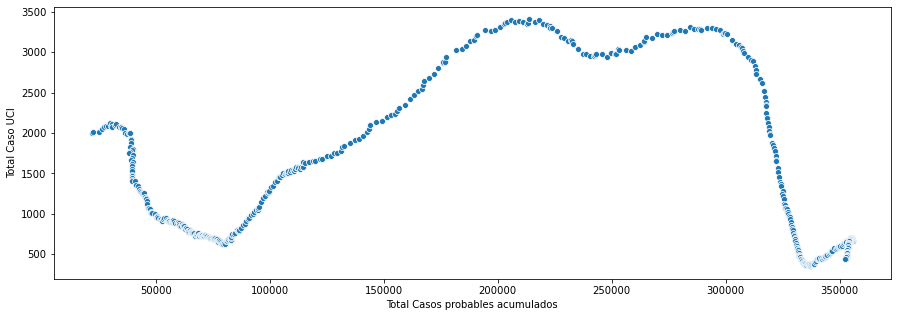

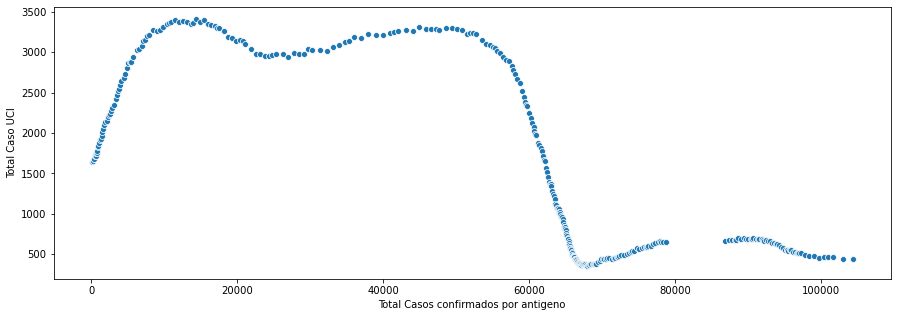

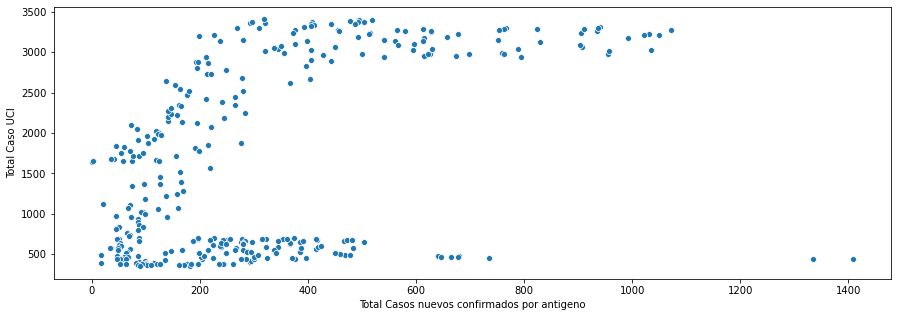

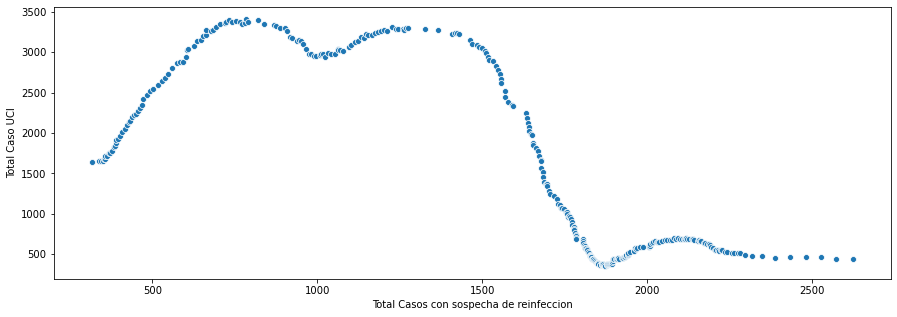

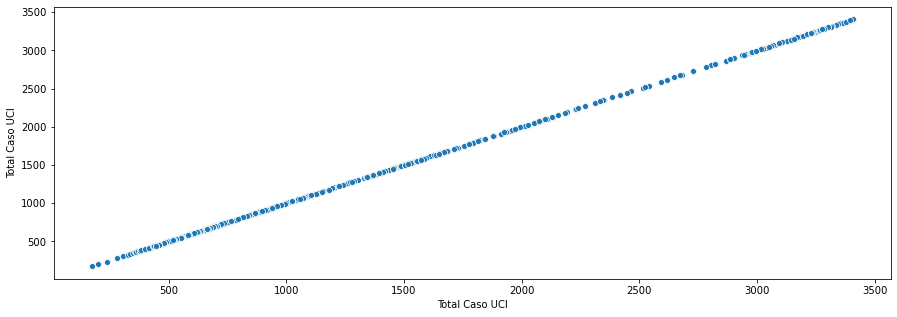

In [580]:
#Analisis para ver linealidad entre regresores
for i in vselector:
    plt.figure(figsize=(15,5))
    sns.scatterplot(x=a[i],y=uselector,data=df);

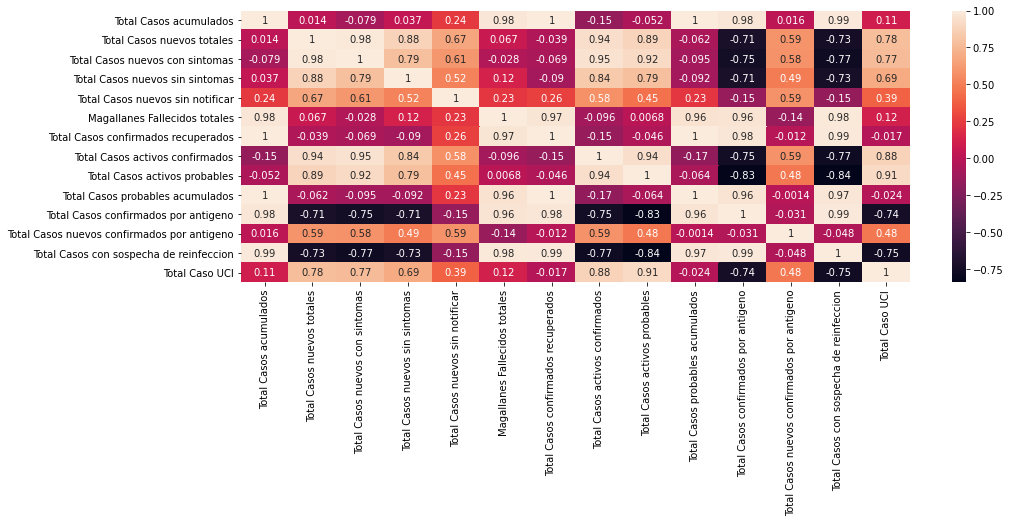

In [581]:
#analizar correlaciones entre todos los regresores, para ver su importancia.
plt.figure(figsize=(15,5))
corr=dfa.corr()
sns.heatmap(corr, annot=True);

<h1 style="text-align:center;font-family: 'Computer Modern Sans';font-weight:bolder">Modelo Predictivo</h1>

### Preparamos los datos


In [582]:
#relleno de datos con la media de cada regresor
dfa.columns
dfa.mean()
dfa=dfa.fillna(dfa.mean())
#dfa=dfa.fillna(0)
dfa

,Total Casos acumulados,Total Casos nuevos totales,Total Casos nuevos con sintomas,Total Casos nuevos sin sintomas,Total Casos nuevos sin notificar,Magallanes Fallecidos totales,Total Casos confirmados recuperados,Total Casos activos confirmados,Total Casos activos probables,Total Casos probables acumulados,Total Casos confirmados por antigeno,Total Casos nuevos confirmados por antigeno,Total Casos con sospecha de reinfeccion,Total Caso UCI
0,3031.0,293.0,293.0,670.383972,206.342606,0.0,1.027332e+06,19099.449219,4649.110352,192958.328125,52733.472656,315.281738,1489.359131,173.0
1,3404.0,373.0,373.0,670.383972,206.342606,0.0,1.027332e+06,19099.449219,4649.110352,192958.328125,52733.472656,315.281738,1489.359131,200.0
2,3737.0,333.0,333.0,670.383972,206.342606,1.0,1.027332e+06,19099.449219,4649.110352,192958.328125,52733.472656,315.281738,1489.359131,237.0
3,4161.0,424.0,424.0,670.383972,206.342606,2.0,1.027332e+06,19099.449219,4649.110352,192958.328125,52733.472656,315.281738,1489.359131,280.0
4,4471.0,310.0,310.0,670.383972,206.342606,2.0,1.027332e+06,19099.449219,4649.110352,192958.328125,52733.472656,315.281738,1489.359131,307.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648,1829437.0,4064.0,1912.0,781.000000,1371.000000,509.0,1.764731e+06,19635.000000,33.000000,352818.000000,100319.000000,665.000000,2431.000000,460.0
649,1833478.0,4069.0,1804.0,763.000000,1502.000000,509.0,1.766310e+06,22098.000000,42.000000,352753.000000,100936.000000,646.000000,2480.000000,460.0
650,1837390.0,3922.0,1859.0,491.000000,1572.000000,509.0,1.767808e+06,24347.000000,39.000000,352693.000000,101600.000000,677.000000,2527.000000,460.0
651,1842218.0,4847.0,2612.0,595.000000,1640.000000,509.0,1.769530e+06,27453.000000,36.000000,352599.000000,102913.000000,1334.000000,2573.000000,445.0


### Seccion de filtros

In [583]:
#como la región metropolitana tenía errores muy alto, decidí proceder a crear un filtro para eliminar el ruido.
if selector=='Metropolitana':
    dfa=dfa[dfa['Metropolitana Casos nuevos totales']<=3500]
    dfa=dfa[dfa['Metropolitana Casos nuevos sin notificar']<=400]
    dfa=dfa[dfa['Metropolitana Casos activos probables']<=6000]
    dfa=dfa[dfa['Metropolitana Casos activos confirmados']<=17000]
    dfa=dfa[dfa['Metropolitana Casos nuevos con sintomas']<=2300]
    dfa=dfa[dfa['Metropolitana Casos nuevos sin sintomas']<=530]

### 1-Modelo con redes neuronales

In [584]:
#Separamos el conjunto de datos en entrenamiento y testeo.
X = dfa.iloc[:, 0:13]
y = dfa[uselector]
#Utilizamos una semilla pseudoaleatoria para que los datos obtenidos en este notebook puedan ser iguales
#a los que pudiese ver el profesor al evaluar.
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=123)

In [585]:
#escala de caracteristicas 
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [586]:
#se define la forma de la red neuronal
mlp = MLPClassifier(hidden_layer_sizes=(10,10,10), max_iter=1000)
mlp.fit(X_train, y_train.values.ravel())

C:\Users\electronmaxi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)

In [587]:
predictions = mlp.predict(X_test)

In [588]:
#Vamos a analizar los datos con los errores entre las predicciones y los datos de prueba
print(mean_squared_error(y_test,predictions))
print(mean_absolute_error(y_test,predictions))

57324.723
128.60204


### Grafico de errores

In [589]:
#Tomé los datos de cada región includia el total de chile, para ver los errores generales
mse=[8.234694,44.709183,96.744896,5.1530614,108.03571,582.2653,23154.246,155.53572,66.03061,17.642857,272.39795,77.091835,9.265306,
    42.765305,1.9489796,17.392857,40451.57]
mae=[1.9489796,3.4336734,5.857143,1.5204082,5.678571,13.785714,94.395065,8.158163,5.4489794,2.877551,11.357142,5.9387755,2.132653,
    4.428571,0.79591835,2.4438775,124.418365]
eje_x=['Arica','Tarapaca','Antofagasta','Atacama','Coquimbo','Valparaiso','Metropolitana','Ohiggins','Maule','Ñuble','Biobio',
       'Araucania','Los rios', 'Los lagos', 'Aysen', 'Magallanes', 'Chile']

In [607]:
from math import log
msel=[]
mael=[]
for i in range(17):
    msel.append(log(mse[i]))
    mael.append(log(mae[i]))
    

<BarContainer object of 17 artists>

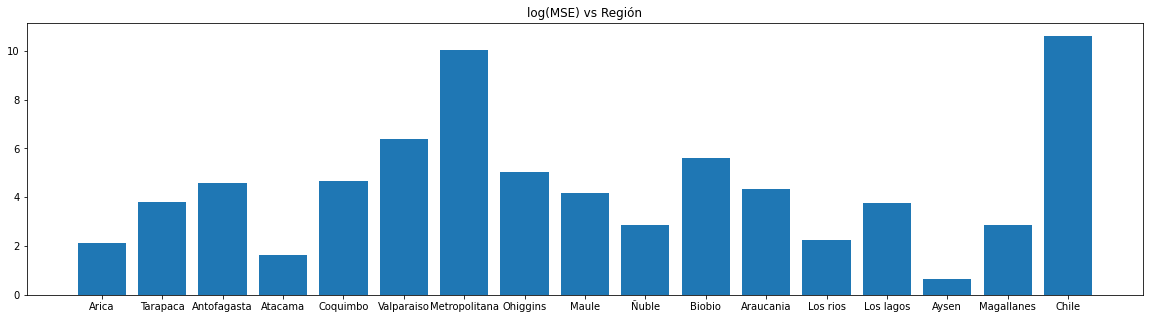

In [613]:
plt.figure(figsize=(20,5))
plt.title('log(MSE) vs Región')
plt.bar(eje_x, msel)

<BarContainer object of 17 artists>

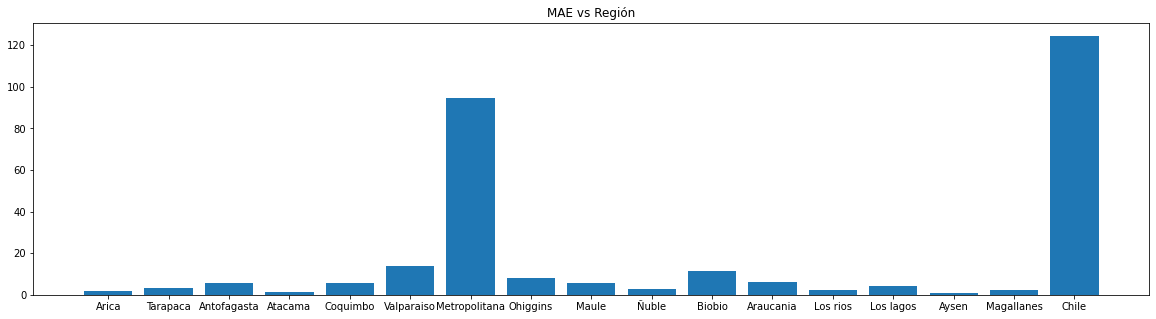

In [610]:
plt.figure(figsize=(20,5))
plt.title('MAE vs Región')
plt.bar(eje_x, mae)